In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
models_data = pd.read_excel('data/models.xlsx', index_col=0)

In [5]:
models_data

,model,year,can_be_branded,car_cnt,car_sticker_cnt,trips_success_cnt,trips_cancel_cnt,trips_defect_cnt,trips_rated_cnt,bad_car_model_tag_cnt,dissapointed_car_model_tag_cnt
0,model_207,year_20,False,1,0,12,3,0,5,0,0
1,model_482,year_19,False,1,0,12,4,0,4,0,0
2,model_499,year_7,False,1,0,46,1,0,14,0,0
3,model_499,year_8,False,3,0,1592,198,10,510,5,1
4,model_499,year_9,False,2,0,49,8,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2962,model_451,year_24,False,2,0,3,1,0,0,0,0
2963,model_451,year_25,False,1,0,7,1,0,3,0,0
2964,model_77,year_29,True,5,0,800,62,3,252,2,2
2965,model_77,year_30,True,1,0,960,183,20,519,4,2


## Распределение машин по годам

In [47]:
years, counts = np.unique(models_data.year.values, return_counts=True)
counts = [counts[i] for i in range(len(counts)) if len(years[i]) == 6] + \
         [counts[i] for i in range(len(counts)) if len(years[i]) == 7]
years = [y[:5] + '0' + y[-1:] for y in years if len(y) == 6] + [y for y in years if len(y) == 7]
years[:10] = [y[:5] + y[-1:] for y in years[:10]]

In [49]:
counts

[1,
 1,
 14,
 8,
 9,
 9,
 10,
 10,
 12,
 16,
 20,
 13,
 20,
 34,
 61,
 72,
 92,
 132,
 145,
 139,
 134,
 144,
 133,
 155,
 171,
 197,
 143,
 142,
 146,
 150,
 138,
 123,
 99,
 71,
 61,
 61,
 49,
 32]

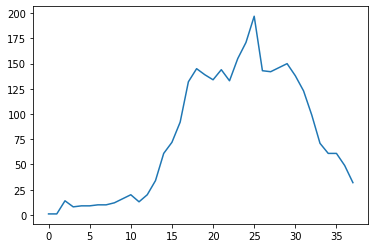

In [50]:
plt.plot(counts)

Удивительно, но в Яндексе еще ездят машины возраста 30+ лет)

Хорошо, что их мало. Основной возраст машин - 10-20 лет.

## Влияние года в действующем классификаторе

Посмотрим, как влияет возраст машины на мнение действующего классификатора

In [39]:
gb = models_data.groupby(by='year')

In [61]:
part_of_approved = [gb.get_group(y).can_be_branded.mean() for y in years]

Text(0, 0.5, 'Part of approved models')

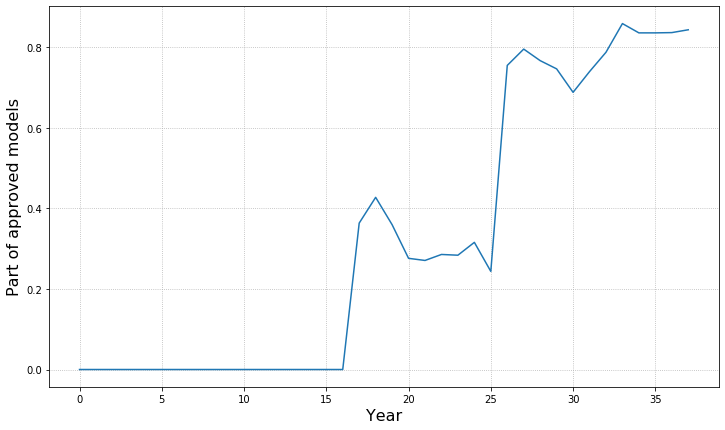

In [62]:
plt.figure(figsize=(12, 7))
plt.grid(ls=':')
plt.plot(part_of_approved)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Part of approved models', fontsize=16)

Видим, что зависимость довольно простая - чем старше машина, тем меньше вероятность, что классификатор одобрит ее оклейку. При этом доля оклеенных машин два раза изменяется скачкообразно.

## Влияние недовольства клиентов в действующем классификаторе

Для каждой модели посмотрим долю пользователей, недовольных моделью машины, и долю годов, машины из которых можно брендировать по мнению действующего классификатора

In [63]:
gb_model = models_data.groupby('model')

In [78]:
bad_car_rates = []
disappointed_car_rates = []
approval_rates = []
defect_rates = []

for group_name in gb_model.groups:
    group = gb_model.get_group(group_name)
    bad_car_rate = group['bad_car_model_tag_cnt'].sum() / max(group['trips_cancel_cnt'].sum(), 1)
    disappointed_car_rate = group['dissapointed_car_model_tag_cnt'].sum() / group['trips_success_cnt'].sum()
    defect_rate = group['trips_defect_cnt'].sum() / group['trips_success_cnt'].sum()
    approval_rate = group['can_be_branded'].mean()
    bad_car_rates.append(bad_car_rate)
    approval_rates.append(approval_rate)
    defect_rates.append(defect_rate)
    disappointed_car_rates.append(disappointed_car_rate)

Text(0, 0.5, 'Part of approved years')

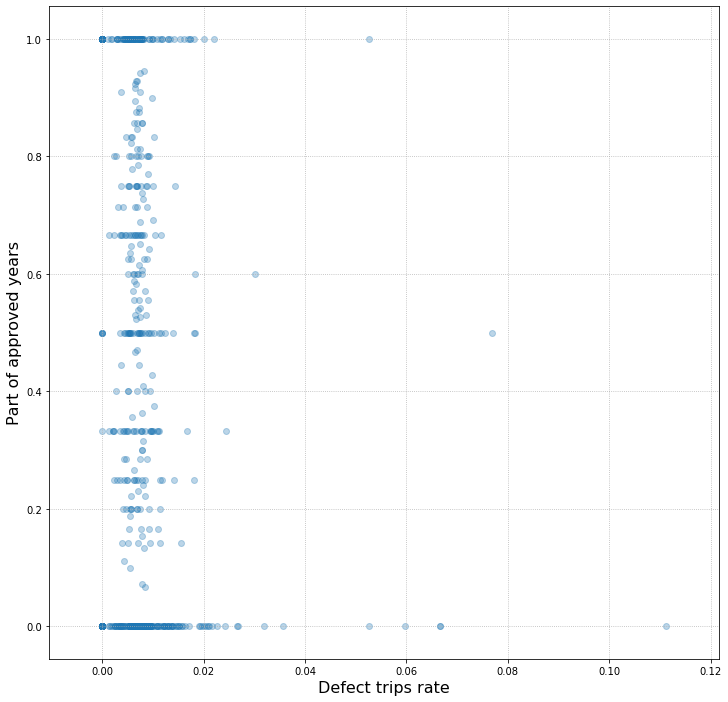

In [75]:
plt.figure(figsize=(12, 12))
plt.scatter(defect_rates, approval_rates, alpha=0.3)
plt.grid(ls=':')
plt.xlabel('Defect trips rate', fontsize=16)
plt.ylabel('Part of approved years', fontsize=16)

Text(0, 0.5, 'Part of approved years')

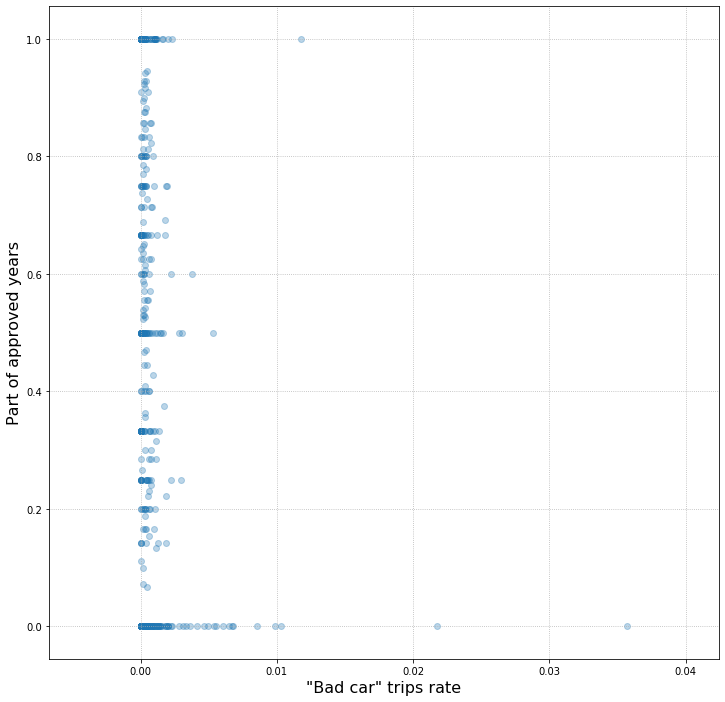

In [84]:
plt.figure(figsize=(12, 12))
plt.scatter(disappointed_car_rates, approval_rates, alpha=0.3)
plt.grid(ls=':')
plt.xlabel('"Bad car" trips rate', fontsize=16)
plt.ylabel('Part of approved years', fontsize=16)

Text(0, 0.5, 'Part of approved years')

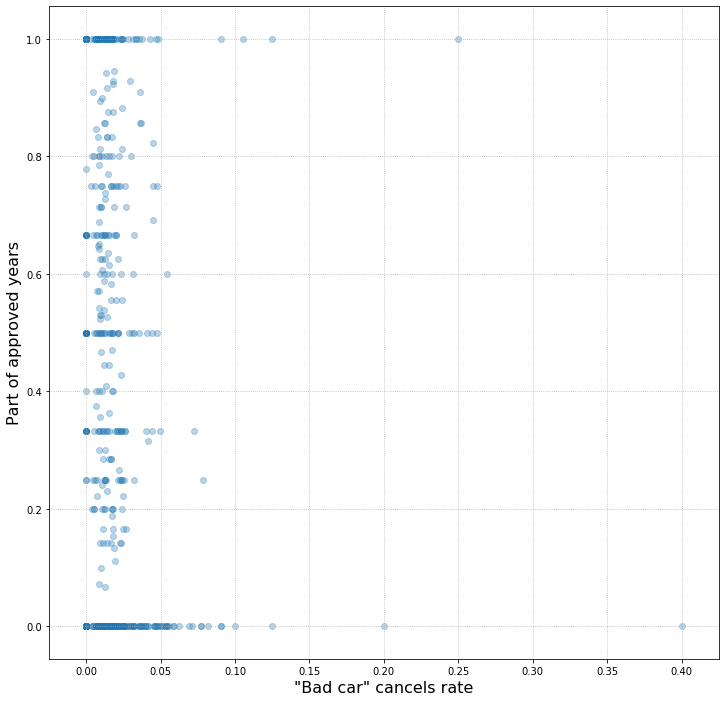

In [85]:
plt.figure(figsize=(12, 12))
plt.scatter(bad_car_rates, approval_rates, alpha=0.3)
plt.grid(ls=':')
plt.xlabel('"Bad car" cancels rate', fontsize=16)
plt.ylabel('Part of approved years', fontsize=16)

Что-то видно только на графике отмен по недовольству маркой машины. Машины, которые классификатор совсем не одобряет, отменяются с тегом "недоволен моделью машины" чаще.

## Влияние возраста машины на недовольство клиентов

In [88]:
defect_rates = []
for year in years:
    group = gb.get_group(year)
    defect_rate = group['trips_defect_cnt'].sum() / group['trips_success_cnt'].sum()
    defect_rates.append(defect_rate)

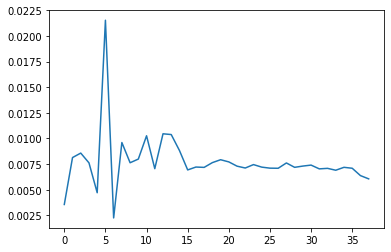

In [89]:
plt.plot(defect_rates)

Видно, что совсем новые машины (до 3-5 лет) вызывают недовольство клиентов немного меньше, чем машины постарше. У совсем старых машин большой разброс, видимо, из-за малого количества таких машин в парке.

## Метрика 1: доля одобренных машин

Для успешной рекламы нужно, чтобы бреднированные машины видели часто. Для этого надо оклеить как можно больше машин. Поэтому при построении классификатора надо учитывать, какая доля машин одобрена для оклеивания.

In [90]:
models_data.columns

Index(['model', 'year', 'can_be_branded', 'car_cnt', 'car_sticker_cnt',
       'trips_success_cnt', 'trips_cancel_cnt', 'trips_defect_cnt',
       'trips_rated_cnt', 'bad_car_model_tag_cnt',
       'dissapointed_car_model_tag_cnt'],
      dtype='object')

In [91]:
part_of_approved = (models_data.can_be_branded * models_data.car_cnt).sum() / models_data.car_cnt.sum()
part_of_sticked = models_data.car_sticker_cnt.sum() / models_data.car_cnt.sum()

In [94]:
print('Percent of approved cars:', np.round(part_of_approved * 100, 1))
print('Percent of sticked cars:', np.round(part_of_sticked * 100, 1))

Percent of approved cars: 79.0
Percent of sticked cars: 14.9


Сейчас классификатор разрешает оклеить 79% всех имеющихся машин. Это довольно много. Но уже оклеены лишь 15% всех машин.

## Метрика 2: недовольство клиентов

Нам нужно брендировать не все машины, а только "хорошие", т.к. "плохие" машины с наклейками Яндекса могут оттолкнуть пользователей. Понять, хорошая машина или нет, можно по уровню недовольства клиентов, ездивших на этой машине.

В данных есть столбец, посвященный недовольству именно моделью машины (`bad_car_model_tag_cnt`). Но, так как машин конкретной модели и года мало, данные в этом могут быть шумными. Чтобы немного сгладить этот шум, будем считать среднюю долю недовольства машиной данной модели по всем возрастам. Возраст здесь не особо важен, т.к. клиент не знает, насколько старая машина к нему приедет, когда отменяет поездку. К тому же, одна модель машины редко выпускается много лет подряд. Запишем эту долю недовольства моделью машины как `bad_car_cancel_rate` = `bad_car_model_tag_cnt` / `trips_cancel_cnt`.

Также в метрике для нового классификатора нужно учитывать общее недовольство (`defect_rate` = `defect_trips_cnt` / `trips_rated_cnt`). Клиенту может не понравиться поездка из-за характеристик машины, но о недовольстве конкретной моделью он может не сообщить. Также это поможет немного сгладить шум, вызванный малым количеством отмен поездки.

Попробуем в качестве метрики недовольства взять величину

`bad_car_cancel_rate` + $\alpha$ * `defect_rate`,

где параметр $\alpha$ выберем равным 0.2-0.5.

Посмотрим отдельно на распределение доли поездок, отмененных по причине "Недоволен моделью машины", и доли поездок с плохой оценкой.

### Разбивка по паре (машина, год)

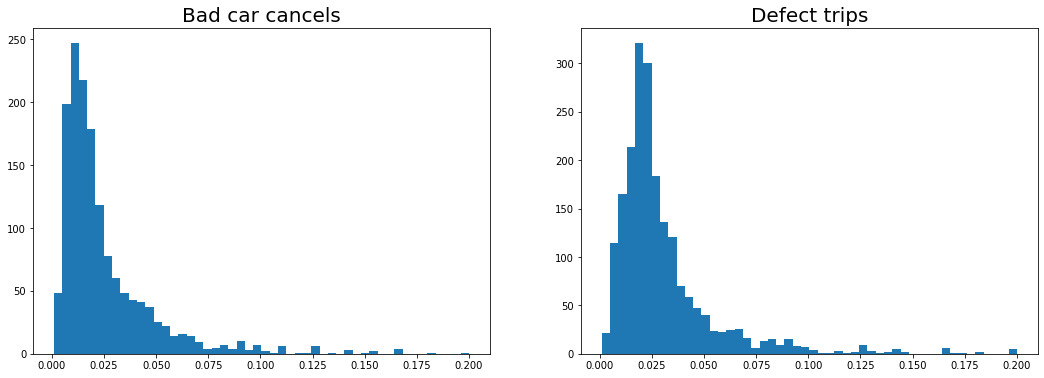

In [143]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title('Bad car cancels', fontsize=20)
_ = plt.hist(bad_car_cancel_rate, bins=50, range=(0.001, 0.2))
plt.subplot(1, 2, 2)
plt.title('Defect trips', fontsize=20)
_ = plt.hist(defect_rate, bins=50, range=(0.001, 0.2))

Видим, что эти распределения очень похожи и значения долей имеют один порядок.

### Разбивка по модели машины

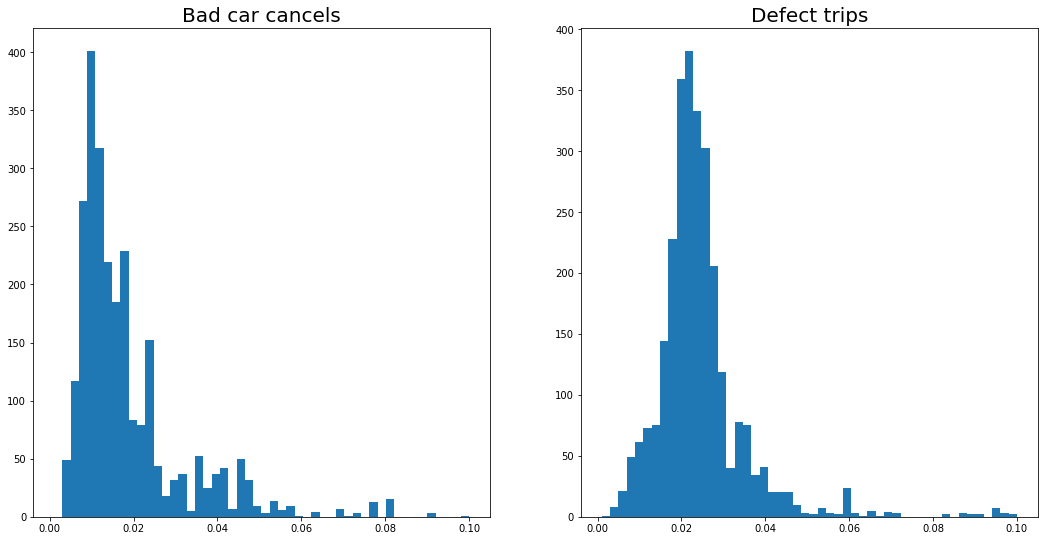

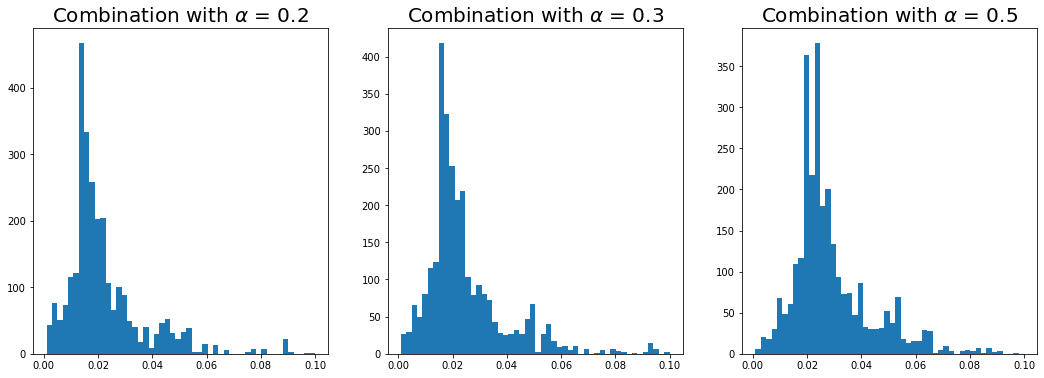

In [191]:
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.title('Bad car cancels', fontsize=20)
_ = plt.hist(models_data['bad_car_cancel_rate_of_car_model'].values, bins=50, range=(0.001, 0.1))
plt.subplot(1, 2, 2)
plt.title('Defect trips', fontsize=20)
_ = plt.hist(models_data['defect_rate_of_car_model'].values, bins=50, range=(0.001, 0.1))
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
alpha = 0.2
plt.title('Combination with $\\alpha$ = {}'.format(alpha), fontsize=20)
_ = plt.hist(models_data['bad_car_cancel_rate_of_car_model'].values + \
             alpha * models_data['defect_rate_of_car_model'].values,
             bins=50, range=(0.001, 0.1))
plt.subplot(1, 3, 2)
alpha = 0.3
plt.title('Combination with $\\alpha$ = {}'.format(alpha), fontsize=20)
_ = plt.hist(models_data['bad_car_cancel_rate_of_car_model'].values + \
             alpha * models_data['defect_rate_of_car_model'].values,
             bins=50, range=(0.001, 0.1))
plt.subplot(1, 3, 3)
alpha = 0.5
plt.title('Combination with $\\alpha$ = {}'.format(alpha), fontsize=20)
_ = plt.hist(models_data['bad_car_cancel_rate_of_car_model'].values + \
             alpha * models_data['defect_rate_of_car_model'].values,
             bins=50, range=(0.001, 0.1))

Выберем $\alpha$ = 0.2

Посмотрим значение метрики недовольства среди машин, одобренных текущим классификатором:

In [220]:
alpha = 0.2
disappointment_rate_of_approved = np.sum((models_data['bad_car_cancel_rate_of_car_model'].values + \
                                  alpha * models_data['defect_rate_of_car_model'].values) * \
                                  models_data['can_be_branded'].values * models_data['car_cnt'].values) / \
                                  np.sum(models_data['car_cnt'].values * models_data['can_be_branded'].values)
print('Disappointment rate of approved cars (in percent):', \
      np.round(disappointment_rate_of_approved * 100, 2))

Disappointment rate of approved cars (in percent): 2.01


А теперь - среди всех машин:

In [221]:
alpha = 0.2
disappointment_rate_of_all = np.mean(models_data['bad_car_cancel_rate_of_car_model'].values + \
                             alpha * models_data['defect_rate_of_car_model'].values)
print('Disappointment rate of all cars (in percent):', \
      np.round(disappointment_rate_of_all * 100, 2))

Disappointment rate of all cars (in percent): 2.16


В общем, текущий классификатор, основанный на экспертном мнении, работает адекватно. Но можно сделать еще лучше. 

Нарисуем кривую значений двух метрик при выборе самых лучших моделей машин с точки зрения недовольства клиентов.

In [222]:
metric_values = []
total_car_cnt = models_data['car_cnt'].sum()
alpha = 0.2
for model_name in gb_model.groups:
    group = gb_model.get_group(model_name)
    part_of_car_pool = group['car_cnt'].sum() / total_car_cnt
    disappointment = group['bad_car_cancel_rate_of_car_model'].values[0] + \
                     alpha * group['defect_rate_of_car_model'].values[0]
    metric_values.append((disappointment, part_of_car_pool))

In [223]:
metric_values.sort(key=lambda x: x[0])
metric_values = np.array(metric_values)
print(metric_values.shape)

(616, 2)


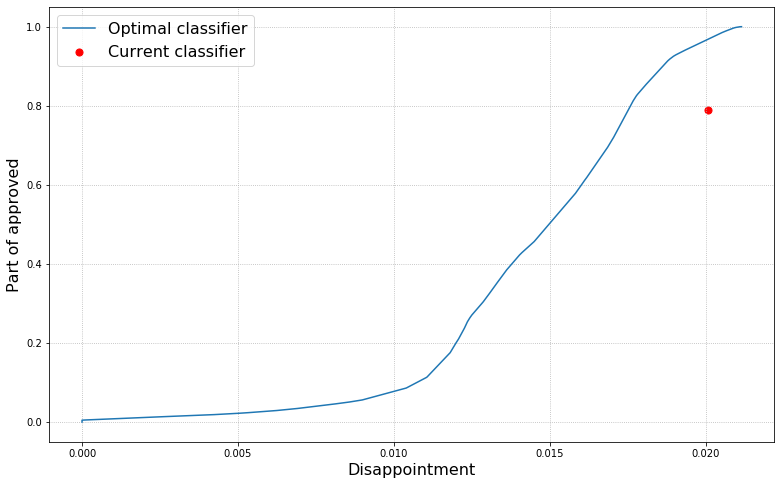

In [224]:
plt.figure(figsize=(13, 8))
plt.grid(ls=':')
plt.xlabel('Disappointment', fontsize=16)
plt.ylabel('Part of approved', fontsize=16)
plt.plot((metric_values[:, 0] * metric_values[:, 1]).cumsum() / metric_values[:, 1].cumsum(),
         metric_values[:, 1].cumsum(),
         label='Optimal classifier')
plt.scatter([disappointment_rate_of_approved], [part_of_approved],
            color='r', s=50, label='Current classifier')
plt.legend(fontsize=16)

Нам хочется в левый верхний угол (чтобы недовольство среди одобренных моделей было маленьким, а доля одобренных моделей - большой). Но левее голубой кривой мы не можем быть. Какую точку на ней выбрать - зависит от того, сколько машин мы хотим оклеить.

## Метрики у партнеров

In [227]:
partners_data = pd.read_excel('data/partners.xlsx', index_col=0)

In [230]:
partners_data

,partner,model,year,car_cnt,car_sticker_cnt
0,partner_6613,model_147,year_30,1,0
1,partner_7944,model_615,year_26,1,1
2,partner_7944,model_576,year_29,1,1
3,partner_7944,model_576,year_30,1,0
4,partner_7944,model_362,year_23,1,0
...,...,...,...,...,...
33785,partner_3447,model_416,year_32,1,0
33786,partner_3969,model_576,year_26,1,0
33787,partner_5479,model_256,year_18,1,0
33788,partner_4734,model_425,year_30,1,1


In [232]:
gb_partner = partners_data.groupby(by='partner')

In [233]:
len(gb_partner.groups)

8997

In [234]:
car_counts = []
car_sticked_counts = []
for partner in gb_partner.groups.keys():
    group = gb_partner.get_group(partner)
    car_cnt = group['car_cnt'].sum()
    car_counts.append(car_cnt)
    car_sticked_counts.append(group['car_sticker_cnt'].sum())

In [235]:
car_counts = np.array(car_counts)
car_sticked_counts = np.array(car_sticked_counts)

In [236]:
(car_counts == 1).mean()

0.7109036345448483

У нас есть почти 9000 партнеров. Из них 71% с одной машиной (т.е. индивидуальные водители, а не компании).

Посмотрим, какую долю машин партнеров одобряет к покраске наш старый классификатор

In [250]:
partners_cbb = partners_data.merge(models_data, 
                                   on=['model', 'year'], 
                                   how='left')[['partner', 'model', 'year', 'can_be_branded', 'car_cnt_x']]

In [254]:
gb_partner = partners_cbb.groupby(by='partner')
parts_of_approved = []

for partner in gb_partner.groups.keys():
    group = gb_partner.get_group(partner)
    part_of_approved = (group['can_be_branded'] * group['car_cnt_x']).sum() / group['car_cnt_x'].sum()
    parts_of_approved.append(part_of_approved)

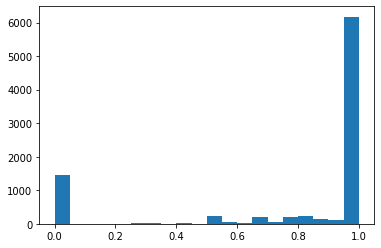

In [257]:
_ = plt.hist(parts_of_approved, bins=20)

В распределении есть два пика - 0 и 1, т.к. у большинства партнеров одна машина возможны только эти два значения.

In [258]:
part_of_approved_partners = (partners_cbb['car_cnt_x'] * partners_cbb['can_be_branded']).sum() / \
                             partners_cbb['car_cnt_x'].sum()
print('Total part of approved:', np.round(part_of_approved_partners, 3))

Total part of approved: 0.798


Доля одобренных машин у партнеров в целом не отличается от доли наших одобренных машин.

Чтобы партнерам не было грустно, нужно, чтобы при новом классификаторе у них не уменьшалась доля одобренных машин. Посмотрим, что на это скажет новый классификатор.

Выберем на оптимальной кривой такую точку, чтобы одобренных машин было не меньше, чем у текущего классификатора, но при этом машины имели низкий `defect_rate`.

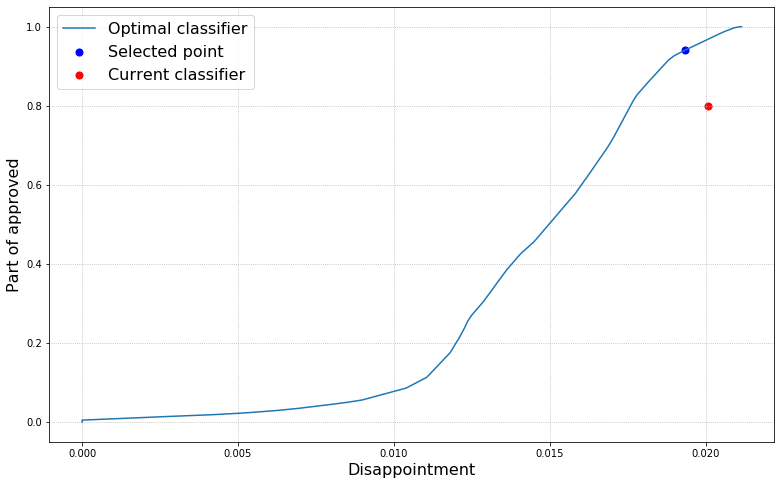

In [298]:
plt.figure(figsize=(13, 8))
plt.grid(ls=':')
plt.xlabel('Disappointment', fontsize=16)
plt.ylabel('Part of approved', fontsize=16)
metric1 = (metric_values[:, 0] * metric_values[:, 1]).cumsum() / metric_values[:, 1].cumsum()
metric2 = metric_values[:, 1].cumsum()
plt.plot(metric1, metric2, label='Optimal classifier')
i = 550
plt.scatter([metric1[i]], [metric2[i]],
            color='b', s=50, label='Selected point')
plt.scatter([disappointment_rate_of_approved], [part_of_approved],
            color='r', s=50, label='Current classifier')
plt.legend(fontsize=16)

In [299]:
approved_models = list(gb_model.groups.keys())[:i]

In [300]:
partners_cbb['can_be_branded_new'] = [(x in approved_models) for x in partners_cbb['model'].values]

In [301]:
part_of_newly_approved_partners = (partners_cbb['car_cnt_x'] * partners_cbb['can_be_branded_new']).sum() / \
                                   partners_cbb['car_cnt_x'].sum()
print('Total part of approved with ours:', np.round(part_of_newly_approved_partners, 3))

Total part of approved with ours: 0.889


В среднем доля наших партнеров, которые могут оклеиться, значительно выросла.